# Introduction to the workflow structure

This notebook gives an overview of the workflow structure and introduces useful DataJoint tools for exploration.
+ DataJoint needs to be configured before running this notebook. If you haven't done so, refer to notebook [01-configure](01-configure.ipynb).
+ If you are familar with DataJoint workflow structures, proceed to the next notebook [03-process](03-process.ipynb) directly to run this workflow.
+ For a more thorough introduction of DataJoint functions, please visit our [general documentation](https://docs.datajoint.org/python/v0.13/index.html)

To load the local configuration, we will change the directory to the package root.

In [1]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

## Schemas, Diagrams and Tables

Schemas are conceptually related sets of tables. By importing schemas from `workflow_array_ephys.pipeline`, we'll declare the tables on the server with the prefix in the config (if we have permission to do so). If these tables are already declared, we'll gain access. 

- `dj.list_schemas()` lists all schemas a user has access to in the current database
- `<schema>.schema.list_tables()` will provide names for each table in the format used under the hood.

In [3]:
import datajoint as dj
from workflow_array_ephys.pipeline import lab, subject, session, probe, ephys

[2022-09-27 01:46:30,615][INFO]: Connecting jaerongahn@tutorial-db.datajoint.io:3306
[2022-09-27 01:46:31,002][INFO]: Connected jaerongahn@tutorial-db.datajoint.io:3306


In [4]:
probe.schema

Schema `jaerongahn_probe`

In [5]:
ephys.schema.list_tables()

['probe_insertion',
 '#clustering_method',
 '#acquisition_software',
 '#cluster_quality_label',
 'insertion_location',
 '#clustering_param_set',
 '_ephys_recording',
 '_ephys_recording__ephys_file',
 '_l_f_p',
 '_l_f_p__electrode',
 'clustering_task',
 '_clustering',
 'curation',
 '_curated_clustering',
 '_curated_clustering__unit',
 '_waveform_set',
 '_waveform_set__peak_waveform',
 '_waveform_set__waveform']

`dj.Diagram()` plots tables and dependencies in a schema. To see additional upstream or downstream connections, add `- N` or `+ N`.

- `probe`: Neuropixels-based probe information
- `ephys`: Electrophysiology data

In [6]:
# plot diagram for all tables in a schema
dj.Diagram(probe)

FileNotFoundError: [WinError 2] "dot" not found in path.

/Users/cb/miniforge3/envs/ele/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/cb/miniforge3/envs/ele/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/cb/miniforge3/envs/ele/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/cb/miniforge3/envs/ele/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/cb/miniforge

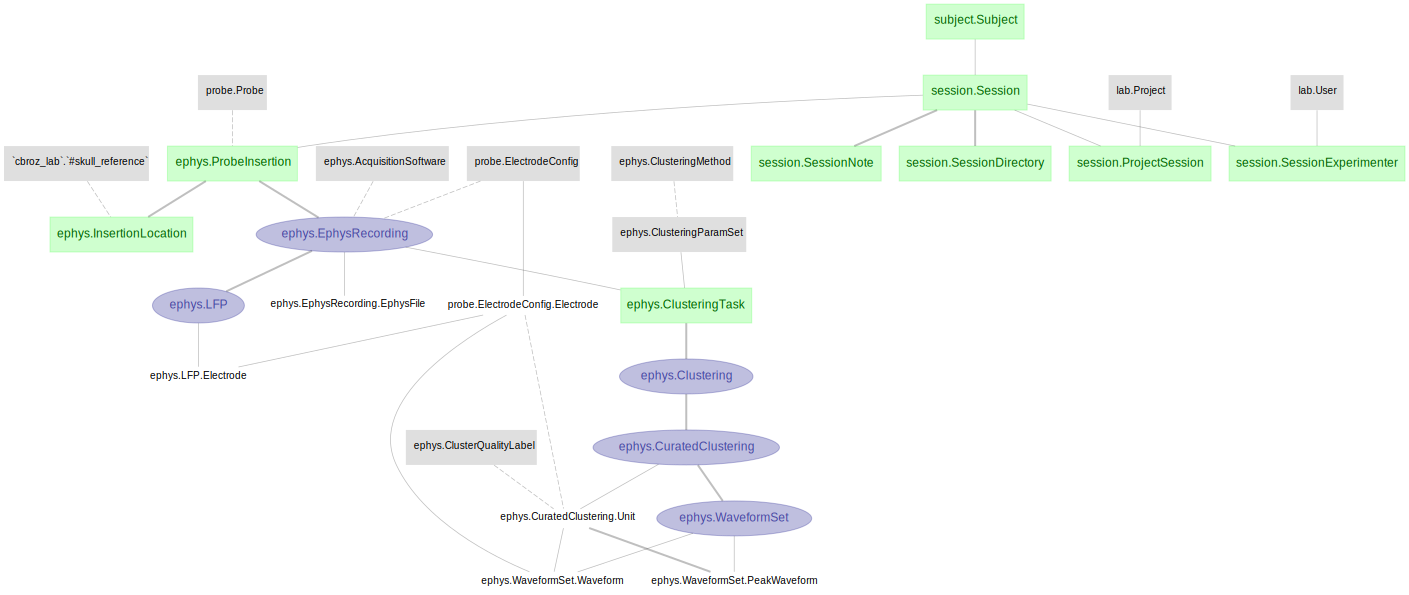

In [6]:
dj.Diagram(ephys) + dj.Diagram(session) - 1

### Table Types

- **Manual table**: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
- **Lookup table**: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
- **Imported table**: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
- **Computed table**: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for     
- **Part table**: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

### Table Links

- **One-to-one primary**: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
- **One-to-many primary**: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
- **Secondary dependency**: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

## Common Table Functions


- `<table>()` show table contents
- `heading` shows attribute definitions
- `describe()` show table definition with foreign key references

In [7]:
# preview table columns and contents in a table
ephys.EphysRecording()

subject,session_datetime,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe


In [8]:
ephys.Clustering.heading

subject              : varchar(8)                   # 
session_datetime     : datetime                     # 
insertion_number     : tinyint unsigned             # 
paramset_idx         : smallint                     # 
---
clustering_time      : datetime                     # time of generation of this set of clustering results
package_version=""   : varchar(16)                  # 

In [9]:
ephys.WaveformSet.describe()

# A set of spike waveforms for units out of a given CuratedClustering
-> ephys.CuratedClustering



'# A set of spike waveforms for units out of a given CuratedClustering\n-> ephys.CuratedClustering\n'

## Other Elements installed with the workflow

- [`lab`](https://github.com/datajoint/element-lab): lab management related information, such as Lab, User, Project, Protocol, Source.
- [`subject`](https://github.com/datajoint/element-animal): (element-animal) general animal information, User, Genetic background, Death etc.
- [`session`](https://github.com/datajoint/element-session): General information of experimental sessions.

For more information about these Elements, see [workflow session](https://github.com/datajoint/workflow-session).

In [10]:
dj.Diagram(lab)

c:\Users\jaero\miniconda3\envs\workflow-array-ephys\lib\inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
c:\Users\jaero\miniconda3\envs\workflow-array-ephys\lib\inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
c:\Users\jaero\miniconda3\envs\workflow-array-ephys\lib\inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


FileNotFoundError: [WinError 2] "dot" not found in path.

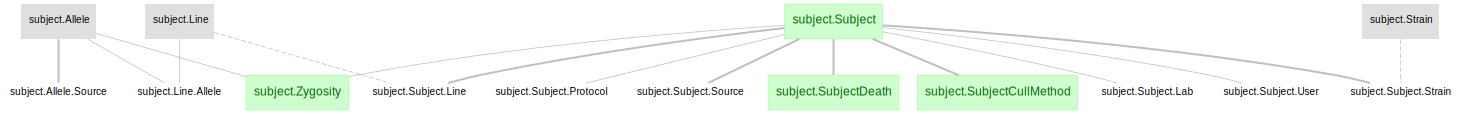

In [11]:
dj.Diagram(subject)

In [11]:
subject.Subject.describe()

# Animal Subject
subject              : varchar(8)                   
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



'# Animal Subject\nsubject              : varchar(8)                   \n---\nsex                  : enum(\'M\',\'F\',\'U\')            \nsubject_birth_date   : date                         \nsubject_description="" : varchar(1024)                \n'

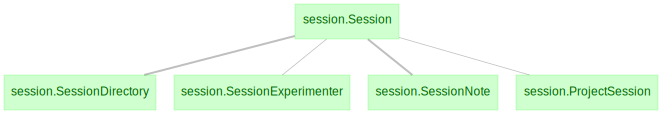

In [13]:
dj.Diagram(session)

## Summary and next step

+ This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

+ In the next notebook [03-process](03-process.ipynb), we will further introduce the detailed steps running through the pipeline and table contents accordingly.